# COVID-19 PANDEMIC IN INDIA 🦠 

![](https://media.giphy.com/media/YSkoyiXAkTS6hV7WsN/giphy.gif)

# What is Corona Virus?

**Coronaviruses are a large family of viruses which may cause illness in animals or humans.  In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19.
The virus that causes COVID-19 is mainly transmitted through droplets generated when an infected person coughs, sneezes, or exhales. These droplets are too heavy to hang in the air, and quickly fall on floors or surfaces.
You can be infected by breathing in the virus if you are within close proximity of someone who has COVID-19, or by touching a contaminated surface and then your eyes, nose or mouth.**
[source](https://www.who.int/news-room/q-a-detail/q-a-coronaviruses)

# COVID-19 INDIA LATEST NEWS!!

**Coronavirus India Live Updates – Lockdown Extension 4.0 Guidelines Latest News: Total Coronavirus cases in India has crossed the 70,000-mark while COVID 19 death toll is near 2300 in the country. As per the data shared by the Ministry of Health and Family Welfare, the total number of COVID-19 cases in India now are 70,756, with 46,008 active cases and 22,454 cured/discharged patients. As many as 2293 people have died and one was migrated. The recovery rate in the country stands at 31 per cent, Health Ministry official said. Prime Minister Narendra Modi has hinted that lockdown may be extended beyond May 17. However, there may be some more relaxations to states Meanwhile, Indian Railways has resumed passenger train operations on select routes. Talks are going on whether domestic flight service will also be started after May 17.
The Global hunt for coronavirus COVID 19 vaccine is on even as large parts of the world is battling a war against the highly contagious disease. Total confirmed coronavirus cases around the world are 4,175,284. So far, 2,85,971 people have died due to COVID 19, according to Johns Hopkins University Coronavirus Resource Center data.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# **INITIAL PERIOD ANALYSIS of COVID-19 IN INDIA(JAN-MAR)**

In [2]:
fread=pd.read_csv("../input/covidindia/AgeGroupDetails.csv")
fread1=fread.select_dtypes(include=['float64','int64'])
fread2=fread.select_dtypes(include=['object'])
fread.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Sno           10 non-null int64
AgeGroup      10 non-null object
TotalCases    10 non-null int64
Percentage    10 non-null object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


In [3]:
fread1.head()

,Sno,TotalCases
0,1,22
1,2,27
2,3,172
3,4,146
4,5,112


# **The following gives details about the percentage of the age group being affected in India in the months of january,february and march.**

In [4]:
fread2.head()

,AgeGroup,Percentage
0,0-9,3.18%
1,10-19,3.90%
2,20-29,24.86%
3,30-39,21.10%
4,40-49,16.18%


In [5]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
labels=le.fit_transform(fread['AgeGroup'])
print(len(le.classes_))
print(le.classes_)

10
['0-9' '10-19' '20-29' '30-39' '40-49' '50-59' '60-69' '70-79' '>=80'
 'Missing']


**Graph portraying the current cases and the age groupas affected in India**

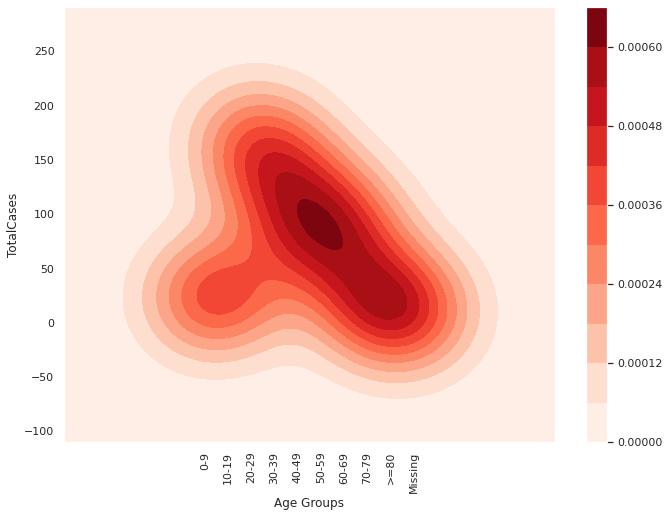

In [6]:
sns.set(rc={'figure.figsize':(11,8)})
x=fread.AgeGroup
y=fread.TotalCases
y_pos=np.arange(len(x))
plt.xticks(y_pos,x)
plt.xticks(rotation=90)
plt.xlabel('Age Groups')


ax=sns.kdeplot(y_pos,y,cmap='Reds',shade=True,cbar=True)


# **Total number of cases,deaths,cured patients in India**

**Ratio of Deaths that have taken place in the three months to the number of patients who have recovered**

In [7]:
covid=pd.read_csv('../input/covidindia/covid19.csv')

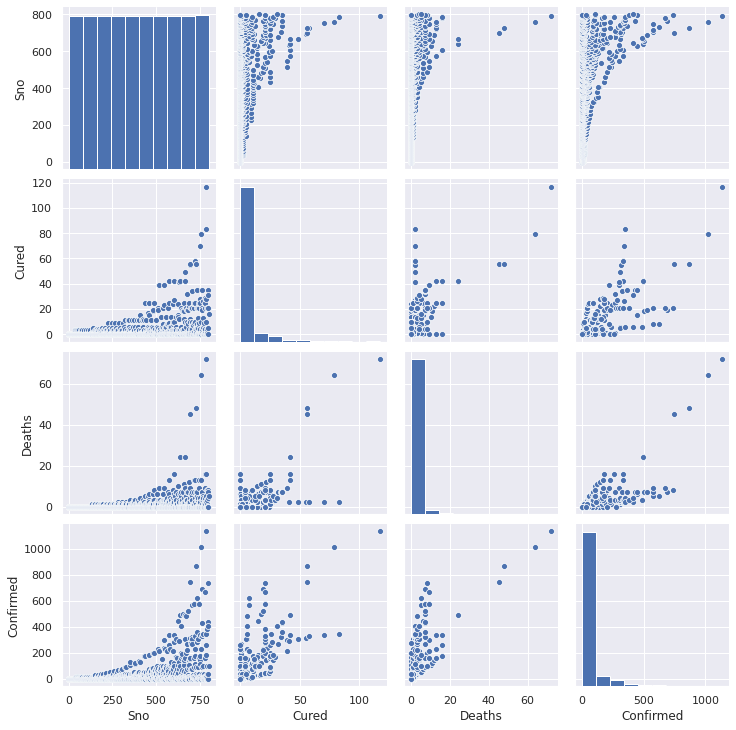

In [8]:
sns.pairplot(covid, palette="Set2")

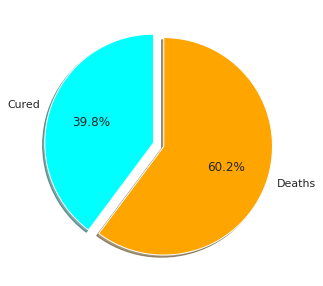

In [9]:
plt.figure(figsize=(5,5))
cured=covid[covid['Cured']==True]
deaths=covid[covid['Deaths']==True]
slices_hours = [cured['Time'].count(),deaths['Time'].count()]
activities = ['Cured', 'Deaths']
colors = ['aqua', 'orange']
explode=(0,0.1)
plt.pie(slices_hours, labels=activities,explode=explode, colors=colors, startangle=90, autopct='%1.1f%%',shadow=True)
plt.show()



# **Predicting future Deaths and  Cures**

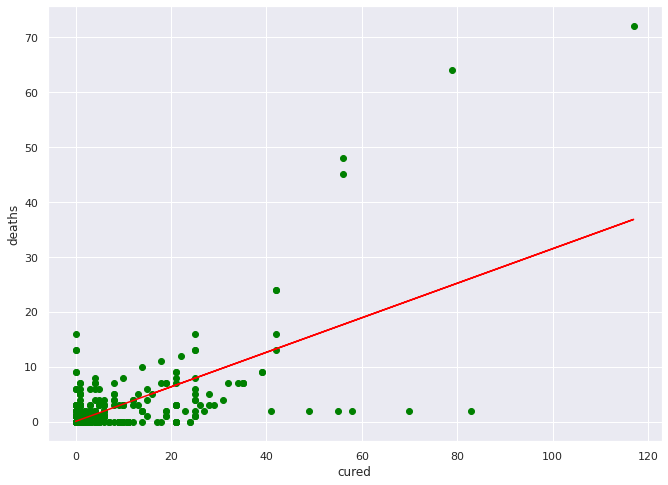

In [10]:

from sklearn.linear_model import LinearRegression
model=LinearRegression()

X=covid[['Cured']]
Y=covid[['Deaths']]
model.fit(X,Y)

Y_pred=model.predict(X)
plt.scatter(X,Y,color='green')
plt.plot(X,Y_pred,color='red')
plt.xlabel('cured')
plt.ylabel('deaths')

plt.show()

In [11]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, Y_pred)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, Y_pred)))

Mean Absolute Error: 1.337005403319323
Mean Squared Error: 12.27619616795177
Root Mean Squared Error: 3.5037403111463283
Root Mean Squared Error: 3.5037403111463283


# **Plot with a kernel density estimate and histogram for Active cases,Cured,Deaths and Confirmed cases**

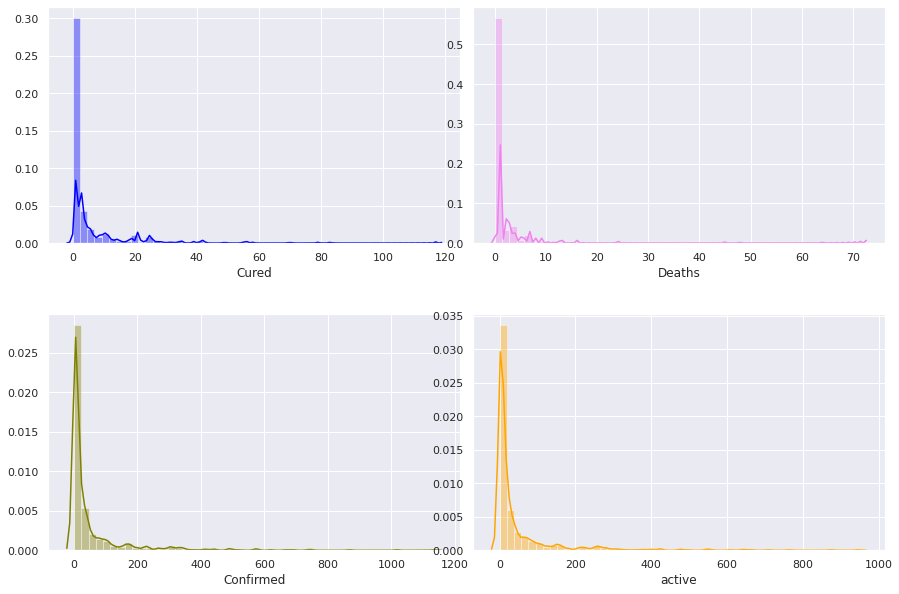

In [12]:
covid['active']=covid['Confirmed']-(covid['Cured']+covid['Deaths'])
f,axes = plt.subplots(2, 2, figsize=(15,10))
sns.distplot( covid["Cured"] , color="blue", ax=axes[0, 0])
sns.distplot( covid["Deaths"] , color="violet", ax=axes[0, 1])
sns.distplot( covid["Confirmed"] , color="olive", ax=axes[1, 0])
sns.distplot( covid["active"] , color="orange", ax=axes[1, 1])
f.subplots_adjust(hspace=.3,wspace=0.03) 


# **Symptoms observed in hospitalized patients with COVID-19**
Below we list the symptoms, with percentages representing the proportion of patients displaying that symptom, as observed in hospitalized patients tested and identified as having laboratory-confirmed COVID-19 infection. These findings refer to hospitalized patients, therefore generally representing serious or critical cases. The majority of cases of COVID-19 (about 80%) is mild.

 **The most common symptoms of COVID-19 are fever, tiredness, and dry cough. Some patients may have aches and pains, nasal congestion, runny nose, sore throat or diarrhea. These symptoms are usually mild and begin gradually. Some people become infected but don’t develop any symptoms and don't feel unwell. Most people (about 80%) recover from the disease without needing special treatment. Around 1 out of every 6 people who gets COVID-19 becomes seriously ill and develops difficulty breathing. Older people, and those with underlying medical problems like high blood pressure, heart problems or diabetes, are more likely to develop serious illness. People with fever, cough and difficulty breathing should seek medical attention.**

**[source](http://worldometers.info/coronavirus/coronavirus-symptoms/)**

In [13]:
symptoms={'symptoms':['Fever','Tiredness','Dry-cough','Shortness of breath','aches and pains','Sore throat','Diarrhoea','Nausea','vomiting','abdominal pain'],'percentage':[98.6,69.9,82,16.6,14.8,13.9,10.1,10.1,3.6,2.2]
    
}
symptoms=pd.DataFrame(data=symptoms,index=range(10))
symptoms


,symptoms,percentage
0,Fever,98.6
1,Tiredness,69.9
2,Dry-cough,82.0
3,Shortness of breath,16.6
4,aches and pains,14.8
5,Sore throat,13.9
6,Diarrhoea,10.1
7,Nausea,10.1
8,vomiting,3.6
9,abdominal pain,2.2


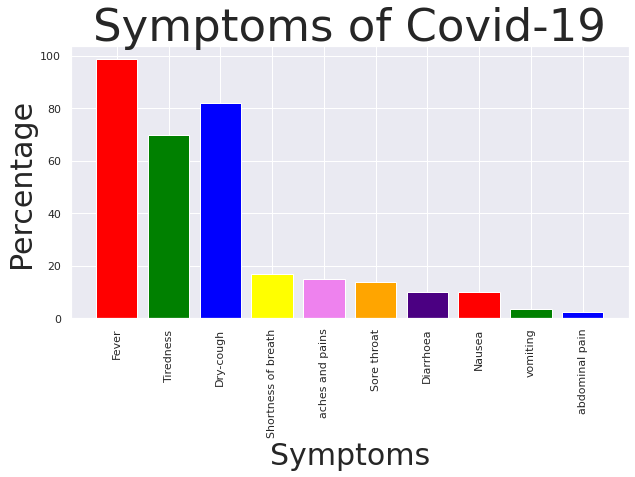

In [14]:
plt.figure(figsize=(10,5))
height=symptoms.percentage
bars=symptoms.symptoms
y_pos = np.arange(len(bars))

my_colors = ['red','green','blue','yellow','violet','orange','indigo']
plt.bar(y_pos, height,color=my_colors)
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)
plt.xlabel("Symptoms", size=30)
plt.ylabel("Percentage", size=30)
plt.title("Symptoms of Covid-19", size=45)

plt.show()


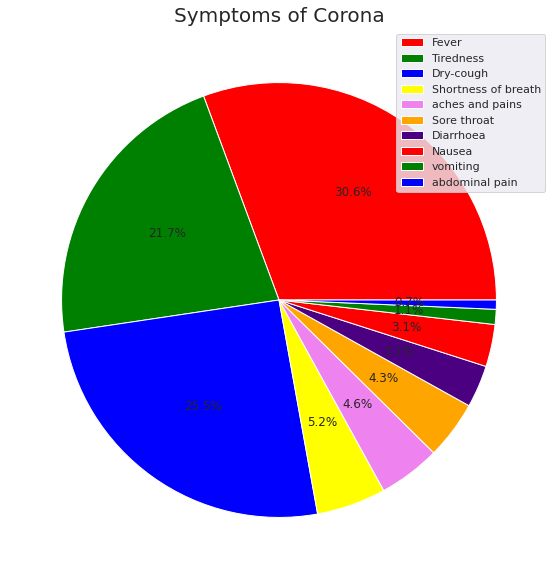

In [15]:
plt.figure(figsize=(10,10))
plt.title("Symptoms of Corona",fontsize=20)
plt.pie(symptoms["percentage"],colors = ['red','green','blue','yellow','violet','orange','indigo'],autopct="%1.1f%%")
plt.legend(symptoms['symptoms'],loc='best')
plt.show() 

# Details of Hospitals and healthcare facilities in India****

In [16]:
hosp=pd.read_csv("../input/covidindia/HospitalBedsIndia.csv")
hosp1=hosp.select_dtypes(include=['float64','int64'])
hosp2=hosp.select_dtypes(include=['object'])

In [17]:
health=hosp.drop([36,37])
obj=list(health.columns[2:8])

for ob in obj:
    health[ob]=health[ob].astype(int,errors='ignore')

<Figure size 792x576 with 0 Axes>

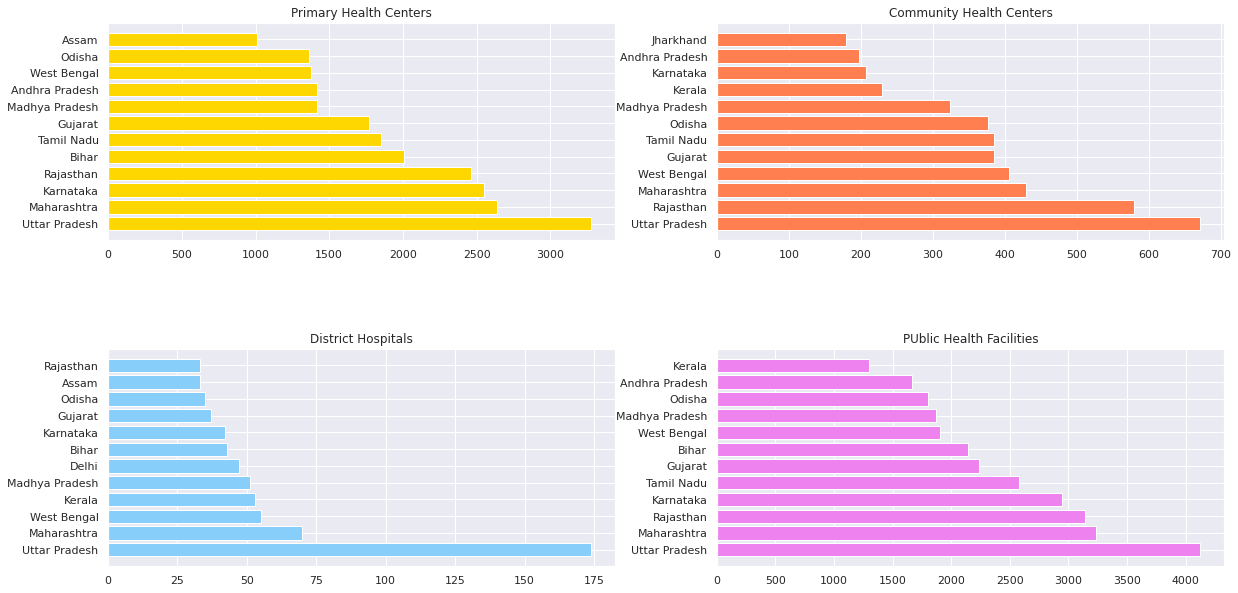

In [18]:
plt.suptitle('HEALTH FACILITIES STATEWISE',fontsize=20)
fig = plt.figure(figsize=(20,10)) 
plt1 = fig.add_subplot(221) 
plt2 = fig.add_subplot(222) 
plt3 = fig.add_subplot(223) 
plt4 = fig.add_subplot(224) 

primary=health.nlargest(12,'NumPrimaryHealthCenters_HMIS')

plt1.set_title('Primary Health Centers')
plt1.barh(primary['State/UT'],primary['NumPrimaryHealthCenters_HMIS'],color ='gold');

community=health.nlargest(12,'NumCommunityHealthCenters_HMIS')
plt2.set_title('Community Health Centers')
plt2.barh(community['State/UT'],community['NumCommunityHealthCenters_HMIS'],color='coral')

dist=health.nlargest(12,'NumDistrictHospitals_HMIS')
plt3.set_title("District Hospitals")
plt3.barh(dist['State/UT'],dist['NumDistrictHospitals_HMIS'],color='lightskyblue')

subd=health.nlargest(12,'TotalPublicHealthFacilities_HMIS')
plt4.set_title('PUblic Health Facilities')
plt4.barh(subd['State/UT'],subd['TotalPublicHealthFacilities_HMIS'],color='violet')

fig.subplots_adjust(hspace=.5,wspace=0.2) 


In [19]:
indiv=pd.read_csv("../input/covidindia/IndividualDetails.csv")
indiv2=indiv.select_dtypes(include=['float64','int64'])
indiv3=indiv.select_dtypes(include=['object'])


# **Percentage of males and females affected**

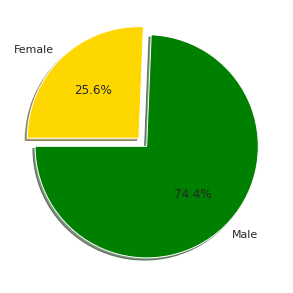

In [20]:
plt.figure(figsize=(5,10))
male=indiv[indiv['gender']=='M']
female=indiv[indiv['gender']=='F']
slices_hours = [male['age'].count(),female['age'].count()]
activities = ['Male', 'Female']
colors = ['green', 'gold']
explode=(0,0.1)
plt.pie(slices_hours, labels=activities,explode=explode, colors=colors, startangle=180, autopct='%1.1f%%',shadow=True)
plt.show()


# **APRIL Analysis of COVID-19**

In [21]:
april=pd.read_csv("../input/april2020/2020_04_08.csv")
april2=april.select_dtypes(include=['float64','int64'])
april3=april.select_dtypes(include=['object'])


# **Preprocesssing of Data**

In [22]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
labels=le.fit_transform(april['Death'])
print(len(le.classes_))
print(le.classes_)

10
[ 0  1  2  3  4  5  7  9 13 64]


In [23]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
labels=le.fit_transform(april['Cured/Discharged/Migrated'])
print(len(le.classes_))
print(le.classes_)

17
[ 0  1  2  4  5  7  9 10 13 19 21 25 26 28 35 70 79]


# **Death Value Counts**

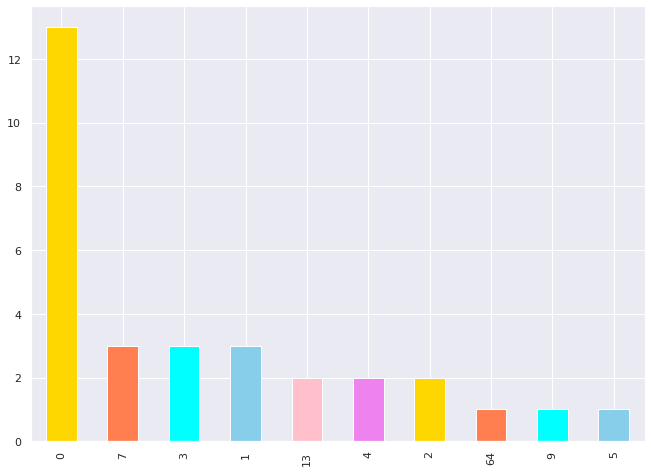

In [24]:
april.Death.value_counts().plot.bar(color=['gold','coral','aqua','skyblue','pink','violet'])


# **Current situation in India:-CURED,TOTAL CASES, DEATHS**

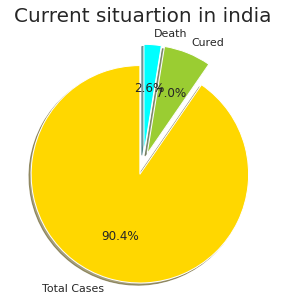

In [25]:
cases=april['Total cases'].sum()
cdm=april['Cured/Discharged/Migrated'].sum()
d=april['Death'].sum()

plt.figure(figsize=(5,5))
plt.title("Current situartion in india",fontsize=20)
labels='Total Cases','Cured','Death'
sizes=[cases,cdm,d]
explode=[0.1,0.1,0.1]
colors=['gold','yellowgreen','aqua']
plt.pie(sizes,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True,startangle=90)
plt.show() 

# TOTAL CASES TILL 8th of April,2020****

In [26]:
april['active']=april['Total cases']-april['Death']-april['Cured/Discharged/Migrated']
print(april['active'].sum())
print(april['Total cases'].sum())

4714
5274


# **Current situation in India:-CURED,ACTIVE CASES, DEATHS**

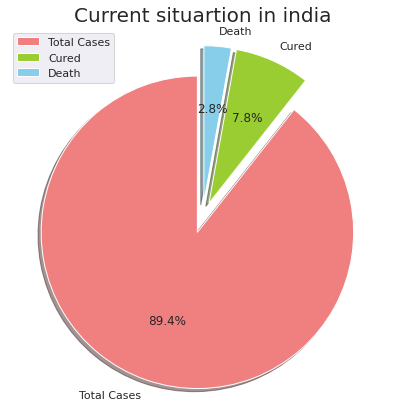

In [27]:
cases=april['active'].sum()
cdm=april['Cured/Discharged/Migrated'].sum()
d=april['Death'].sum()

plt.figure(figsize=(7,7))
plt.title("Current situartion in india",fontsize=20)
labels='Total Cases','Cured','Death'
sizes=[cases,cdm,d]
explode=[0.1,0.1,0.1]
colors=['lightcoral','yellowgreen','skyblue']
plt.axis('equal')
plt.pie(sizes,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True,startangle=90)
plt.legend(labels, loc="best")
plt.show() 

# MORTALITY RATE****

In [28]:
april['mortality']=april['Death']/april['active']*100
print(april['mortality'])

0      1.351351
1      0.000000
2      0.000000
3      0.000000
4      2.702703
5      0.000000
6      0.000000
7      1.648352
8      0.000000
9     10.236220
10     2.586207
11     6.666667
12     1.818182
13     0.000000
14     2.739726
15     0.757576
16     0.000000
17     6.018519
18     7.314286
19     0.000000
20     0.000000
21     2.564103
22     0.000000
23     8.750000
24     0.986842
25     1.054217
26     1.818182
27     0.000000
28     0.000000
29     0.955414
30     6.172840
Name: mortality, dtype: float64


# STATE-WISE DEATHS****

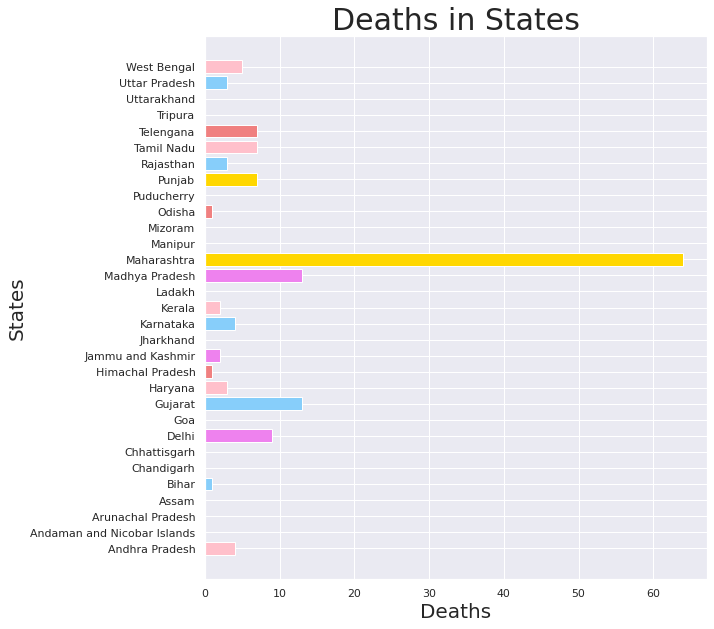

In [29]:
plt.figure(figsize=(9, 10))

height=april['Death']
bars=april['Name of State / UT']
y_pos=np.arange(len(bars))
plt.barh(y_pos,height,color=['pink','lightcoral','violet','gold','lightskyblue'])
plt.yticks(y_pos,bars)
plt.title('Deaths in States',size=30)
plt.ylabel('States',size=20)
plt.xlabel('Deaths',size=20)
plt.show()

# **STATE-WISE CURED/MIGRATED/DISCHARGED**

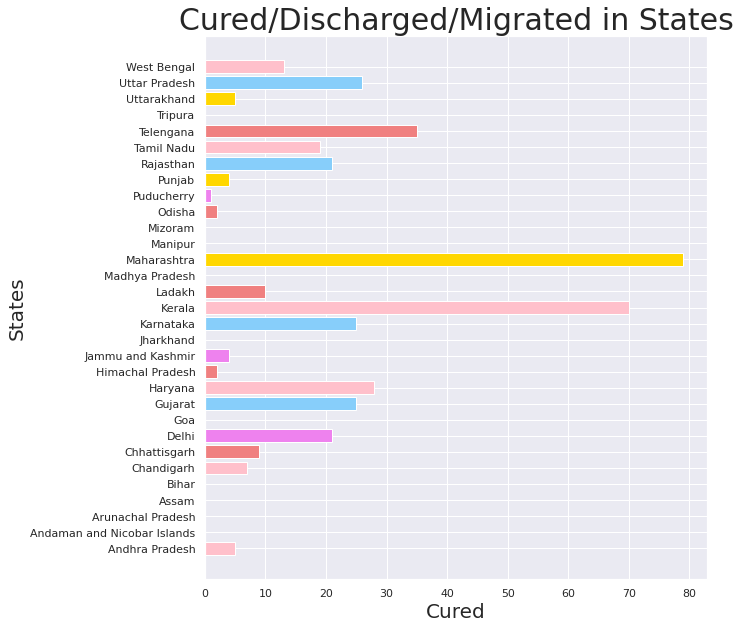

In [30]:
plt.figure(figsize=(9, 10))

height=april['Cured/Discharged/Migrated']
bars=april['Name of State / UT']
y_pos=np.arange(len(bars))
plt.barh(y_pos,height,color=['pink','lightcoral','violet','gold','lightskyblue'])
plt.yticks(y_pos,bars)
plt.title('Cured/Discharged/Migrated in States',size=30)
plt.ylabel('States',size=20)
plt.xlabel('Cured',size=20)
plt.show()

# STATE-WISE MORTALITY RATE****

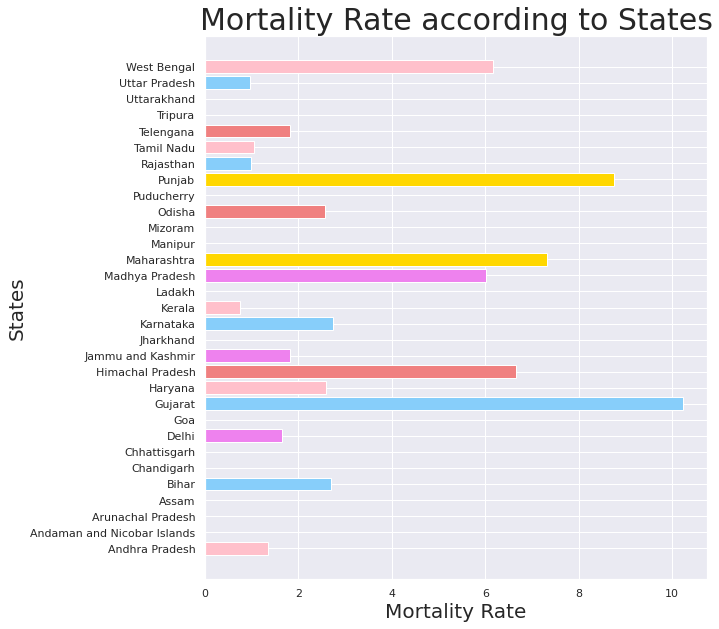

In [31]:
plt.figure(figsize=(9, 10))

height=april['mortality']
bars=april['Name of State / UT']
y_pos=np.arange(len(bars))
plt.barh(y_pos,height,color=['pink','lightcoral','violet','gold','lightskyblue'])
plt.yticks(y_pos,bars)
plt.title('Mortality Rate according to States',size=30)
plt.ylabel('States',size=20)
plt.xlabel('Mortality Rate',size=20)
plt.show()

# STATE-WISE ACTIVE CASES****

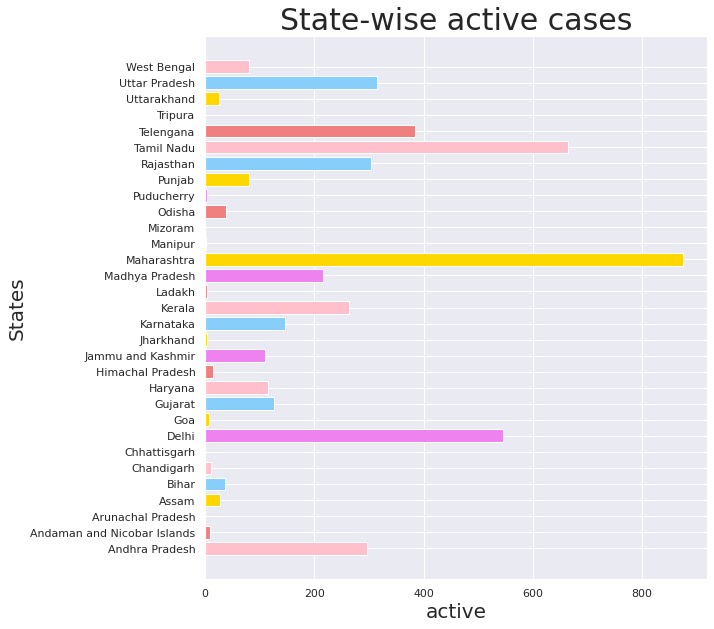

In [32]:
plt.figure(figsize=(9, 10))

height=april['active']
bars=april['Name of State / UT']
y_pos=np.arange(len(bars))
plt.barh(y_pos,height,color=['pink','lightcoral','violet','gold','lightskyblue'])
plt.yticks(y_pos,bars)
plt.title('State-wise active cases',size=30)
plt.ylabel('States',size=20)
plt.xlabel('active',size=20)
plt.show()

# **Aril 12th,2020 Details**

In [33]:
bara=pd.read_csv("../input/12th-april/2020_04_12.csv")
bara2=bara.select_dtypes(include=['float64','int64','object'])



In [34]:
bara2.head(10)

,Name of State / UT,Total Confirmed cases (Including 71 foreign Nationals),Cured/Discharged/Migrated,Death,Date,Latitude,Longitude,Total cases
0,Andhra Pradesh,381,11,6,2020-04-12,15.9129,79.7400,381
1,Andaman and Nicobar Islands,11,10,0,2020-04-12,11.7401,92.6586,11
2,Arunachal Pradesh,1,0,0,2020-04-12,28.2180,94.7278,1
3,Assam,29,0,1,2020-04-12,26.2006,92.9376,29
4,Bihar,63,0,1,2020-04-12,25.0961,85.3131,63
5,Chandigarh,19,7,0,2020-04-12,30.7333,76.7794,19
6,Chhattisgarh,18,9,0,2020-04-12,21.2787,81.8661,18
7,Delhi,1069,25,19,2020-04-12,28.7041,77.1025,1069
8,Goa,7,5,0,2020-04-12,15.2993,74.1240,7
9,Gujarat,432,44,22,2020-04-12,22.2587,71.1924,432


# Increase in total cases when compared to 8th April,2020

Total cases on 12th april

In [35]:
cases=bara['Total cases'].sum()
print(cases)

8356


**The increase in cases from 8th-12th April,2020**

In [36]:
last=(april['Total cases'].sum())
increase=cases-last
print(increase)

3082


# **Percentage increase from 8th to 12th of april 2020.**

In [37]:
percent=increase/last*100
print(percent)

58.437618505877886


In [38]:
dates={'dates':['12/4/2020','8/4/2020'],'cases':[cases,last]}
dates=pd.DataFrame(data=dates,index=range(2))
dates




,dates,cases
0,12/4/2020,8356
1,8/4/2020,5274


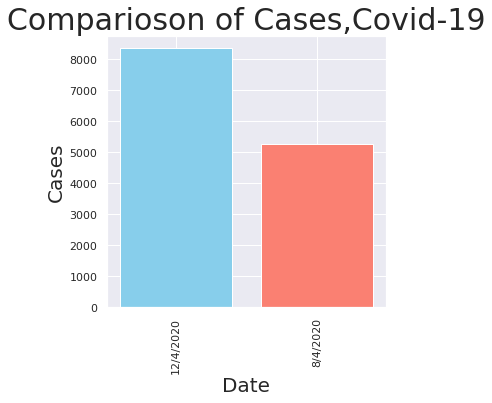

In [39]:
plt.figure(figsize=(5,5))
bars=dates.dates
height=dates.cases
y_pos = np.arange(len(bars))
plt.bar(y_pos, height,color=['skyblue','salmon'])
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)
plt.xlabel("Date", size=20)
plt.ylabel("Cases", size=20)
plt.title("Comparioson of Cases,Covid-19", size=30)


plt.show()

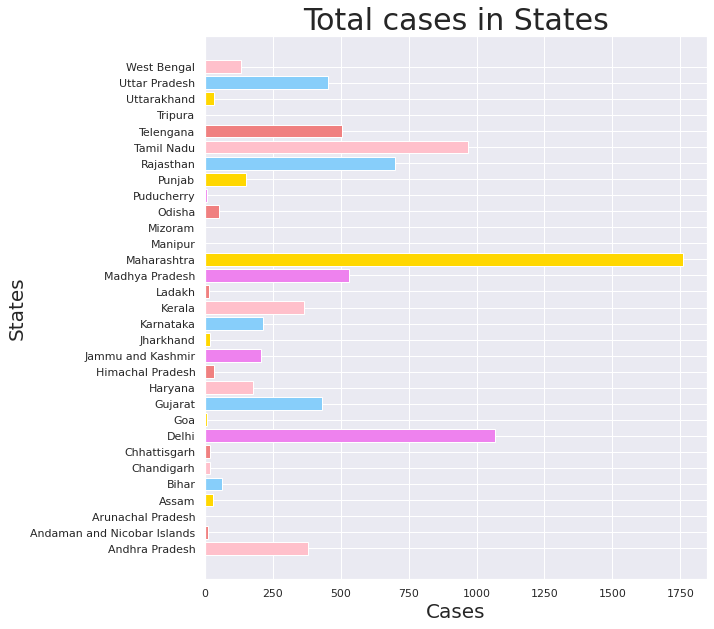

In [40]:
plt.figure(figsize=(9, 10))

height=bara['Total cases']
bars=april['Name of State / UT']
y_pos=np.arange(len(bars))

plt.barh(y_pos,height,color=['pink','lightcoral','violet','gold','lightskyblue'])
plt.yticks(y_pos,bars)
plt.title('Total cases in States',size=30)
plt.ylabel('States',size=20)
plt.xlabel('Cases',size=20)
plt.show()

***Delhi has surpassed Tamil Nadu in the number of covid19 positives and now is NO.2 on the list ,whereas Maharashtra is still at the top with the maximum number of cases at present***

# **Perday New Cases**

In [41]:
perday=pd.read_csv('../input/12th-april/perday_new_cases.csv')
perday2=perday.select_dtypes(include=['int64','float64','object'])
perday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 4 columns):
Unnamed: 0         73 non-null int64
Date               73 non-null object
Confirmed          73 non-null int64
New Daily Cases    73 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.4+ KB


# **APPALLING INCREASE in the COVID19 CASES PERDAY**

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


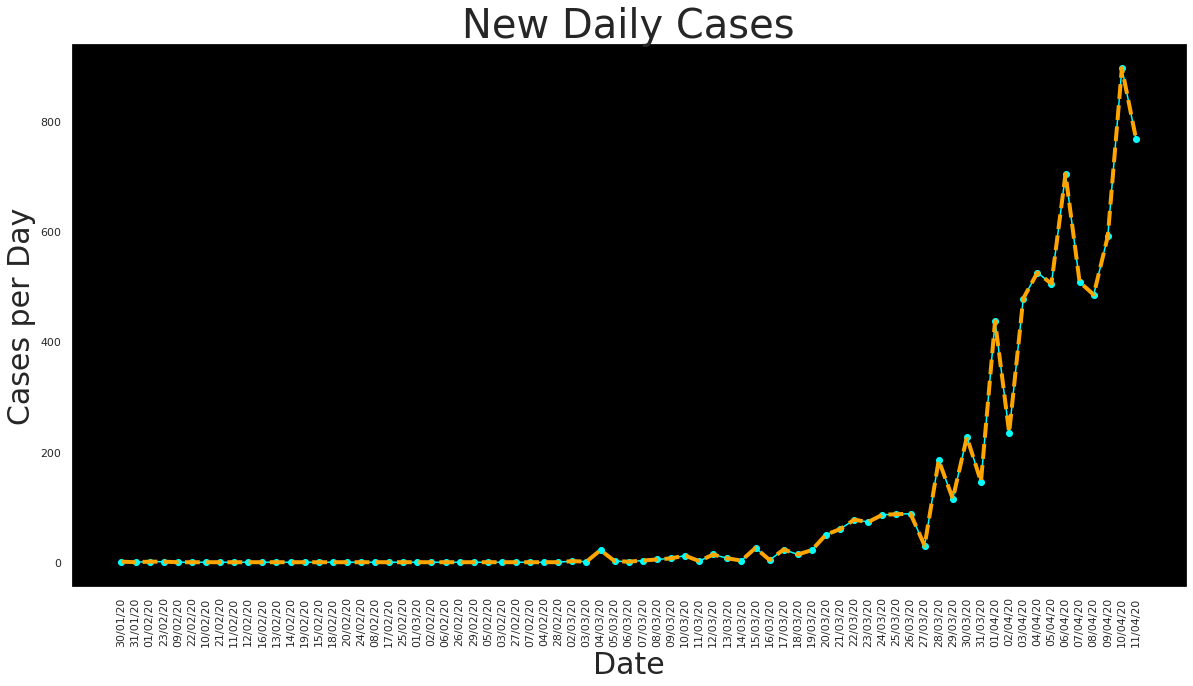

In [42]:
plt.figure(figsize=(20,10),facecolor=(1,1,1))
height=perday['New Daily Cases']
bars=perday['Date']
y_pos=np.arange(len(bars))


plt.plot(y_pos,height,'b-o',color='aqua')
plt.plot(y_pos,height,'r--',color='orange',linewidth=4)
plt.xticks(y_pos,bars)
plt.xticks(rotation=90)
plt.title('New Daily Cases',size=40)
plt.ylabel('Cases per Day',size=30)
plt.xlabel('Date',size=30)
ax = plt.axes()
ax.set_facecolor("black")
ax.grid(False)




# **IMPACT ON LIFESTYLE**

In [43]:
lifestyle={'lifestyle':['Not waste food','Be environment conscious','Be more mindful of Health','Become more hygienic','More Family Time','Spend less on Clothes','Made in India products','Take work more seriously','Boycott Chinese goods'],
          'percentage':[67.7,45.6,44.3,40.5,31.8,31.4,26.4,25.5,24.6]}
lifestyle=pd.DataFrame(data=lifestyle,index=range(9))
lifestyle

,lifestyle,percentage
0,Not waste food,67.7
1,Be environment conscious,45.6
2,Be more mindful of Health,44.3
3,Become more hygienic,40.5
4,More Family Time,31.8
5,Spend less on Clothes,31.4
6,Made in India products,26.4
7,Take work more seriously,25.5
8,Boycott Chinese goods,24.6


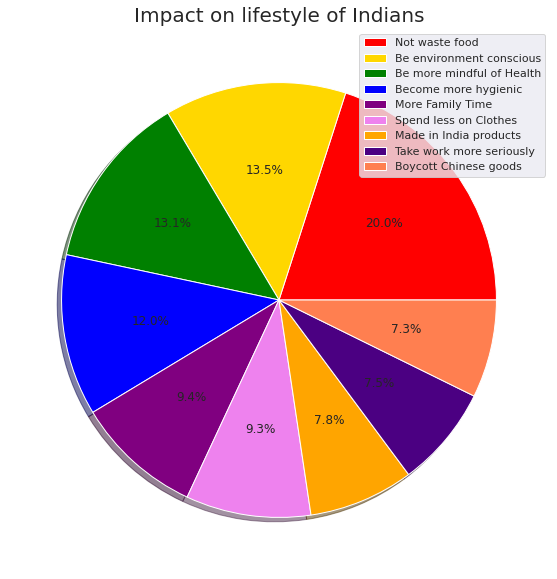

In [44]:
plt.figure(figsize=(10,10))
plt.title("Impact on lifestyle of Indians",fontsize=20)
plt.pie(lifestyle["percentage"],colors = ['red','gold','green','blue','purple','violet','orange','indigo','coral'],autopct="%1.1f%%",shadow=True)
plt.legend(lifestyle['lifestyle'],loc='upper right')
plt.show() 

# **16th April Analysis**

In [45]:
ap=pd.read_csv("../input/16april/16.csv")
app=pd.read_csv("../input/covid19-corona-virus-india-dataset/complete.csv")
ap1=ap.select_dtypes(include=['float64','object','int64'])
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
Date                         33 non-null object
Name of State / UT           33 non-null object
Cured/Discharged/Migrated    33 non-null int64
Latitude                     33 non-null float64
Longitude                    33 non-null float64
Death                        33 non-null int64
Total Confirmed cases        33 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.9+ KB


In [46]:
ap1.head()

,Date,Name of State / UT,Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases
0,16-04-2020,Andaman and Nicobar Islands,10,11.7401,92.6586,0,11
1,16-04-2020,Andhra Pradesh,20,15.9129,79.7400,14,525
2,16-04-2020,Arunachal Pradesh,0,28.2180,94.7278,0,1
3,16-04-2020,Assam,0,26.2006,92.9376,1,33
4,16-04-2020,Bihar,29,25.0961,85.3131,1,70


****Total Deaths Till Today****

In [47]:
deaths=ap1['Death'].sum()
print(deaths)

414


**Total Cured/Discharged till date**

In [48]:
cure=ap1['Cured/Discharged/Migrated'].sum()
print(cure)

1489


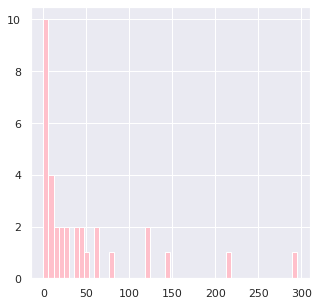

In [49]:
plt.figure(figsize=(5,5))
ap1['Cured/Discharged/Migrated'].hist(color='pink',bins=50)

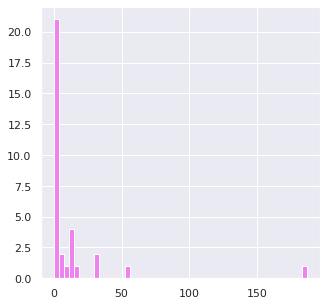

In [50]:
plt.figure(figsize=(5,5))
ap1['Death'].hist(color='violet',bins=50)

**Total Cases till Date**

In [51]:
total=ap1['Total Confirmed cases'].sum()
print(total)

12380


**KILL RATE OF COVID-19 IN INDIA**

In [52]:
kr=(round(deaths/total*100,2));
print("Currently the Mortality Rate of India is:",kr)

Currently the Mortality Rate of India is: 3.34


**We get a simple heatmap instantly highlighting the trend in the data with values of the color scale on the right. From this heatmap, we can see that Deaths in India are increasing towards April and Maharashtra has the highest number of deaths till date**

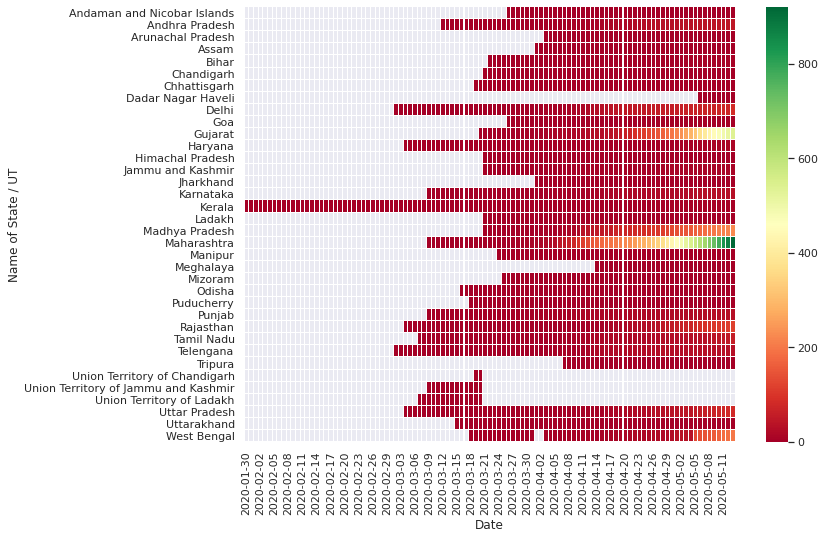

In [53]:
heatmap1_data = pd.pivot_table(app, values='Death', 
                     index=['Name of State / UT'], 
                     columns='Date')


sns.heatmap(heatmap1_data, cmap="RdYlGn",linewidths=0.01)

**We get a simple heatmap instantly highlighting the trend in the data with values of the color scale on the right. From this heatmap, we can observe that the cases are increases at an alarming rate in India,Maharashtra has the maximum number of covid-19 positives followed by Delhi and tamil Nadu**

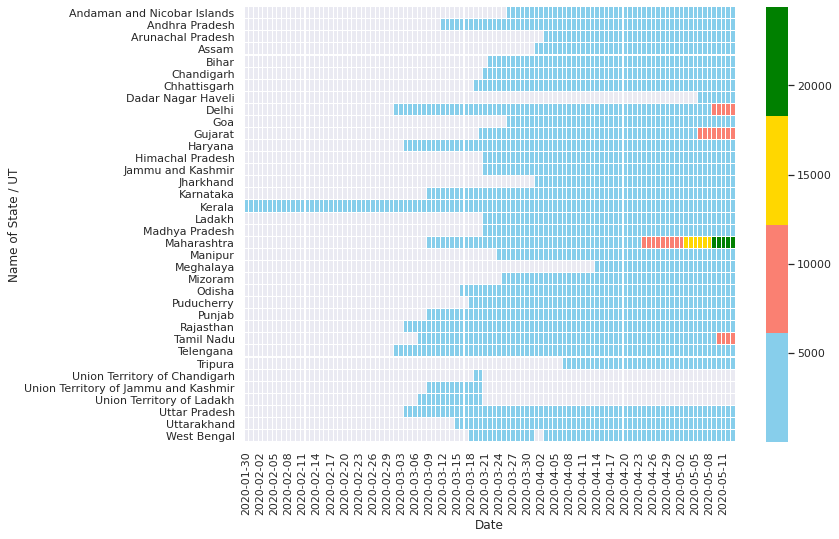

In [54]:
h=pd.pivot_table(app,values='Total Confirmed cases',
index=['Name of State / UT'],
columns='Date')

sns.heatmap(h, cmap=['skyblue','salmon','gold','green'],linewidths=0.05)

**Representing the Confirmed cases in India through Geographic Visualization**

In [55]:
import folium


m = folium.Map(location=[20.5937, 78.9629],zoom_start=5)



for lat,lon,area,count in zip(ap1['Latitude'],ap1['Longitude'],ap1['Name of State / UT'],ap1['Total Confirmed cases']):
     folium.CircleMarker([lat, lon],
                            popup=area,
                            radius=count*0.02,
                            color='red',
                            fill=True,
                            fill_opacity=0.7,
                            fill_color='salmon',
                           ).add_to(m)
m.save('LA collisions.html')
m

**Representing the Deaths in India through Geographic Visualization**

In [56]:
import folium


m = folium.Map(location=[20.5937, 78.9629],zoom_start=5)



for lat,lon,area,count in zip(ap1['Latitude'],ap1['Longitude'],ap1['Name of State / UT'],ap1['Death']):
     folium.CircleMarker([lat, lon],
                            popup=area,
                            radius=count*0.04,
                            color='purple',
                            fill=True,
                            fill_opacity=0.7,
                            fill_color='violet',
                           ).add_to(m)
m.save('LA collisions.html')
m

#  26th APRIL,2020

In [57]:
latest=pd.read_csv('../input/dynamiccovid19india-statewise/26-04-2020.csv')
latest.info()
latest.select_dtypes(include=['object','int64','float64'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
S. No.                                                     35 non-null object
Name of State / UT                                         33 non-null object
Total Confirmed cases (Including 111 foreign Nationals)    33 non-null float64
Cured/Discharged/Migrated                                  33 non-null float64
Death                                                      32 non-null float64
dtypes: float64(3), object(2)
memory usage: 1.5+ KB


,S. No.,Name of State / UT,Total Confirmed cases (Including 111 foreign Nationals),Cured/Discharged/Migrated,Death
0,1,Andaman and Nicobar Islands,33.0,11.0,0.0
1,2,Andhra Pradesh,1097.0,231.0,31.0
2,3,Arunachal Pradesh,1.0,1.0,0.0
3,4,Assam,36.0,27.0,1.0
4,5,Bihar,274.0,56.0,2.0
5,6,Chandigarh,30.0,17.0,0.0
6,7,Chhattisgarh,37.0,32.0,0.0
7,8,Delhi,2918.0,877.0,54.0
8,9,Goa,7.0,7.0,0.0
9,10,Gujarat,3301.0,313.0,151.0


In [58]:
print("Total number of Cases")
latest['Total Confirmed cases (Including 111 foreign Nationals)'].sum()

Total number of Cases


34077.0

In [59]:
print("Total number of Deaths")
latest['Death'].sum()

Total number of Deaths


872.0

In [60]:
import folium


m = folium.Map(location=[20.5937, 78.9629],zoom_start=5)

latest=latest.drop([32,33,34])

for lat,lon,area,count in zip(ap1['Latitude'],ap1['Longitude'],ap1['Name of State / UT'],latest['Total Confirmed cases (Including 111 foreign Nationals)']):
     folium.CircleMarker([lat, lon],
                            popup=area,
                            radius=count*0.01,
                            color='olive',
                            fill=True,
                            fill_opacity=0.7,
                            fill_color='yellow',
                           ).add_to(m)
m.save('LA collisions.html')
m

**We see a sudden spike in the cases in gujarat when compared to the data of 16th April**

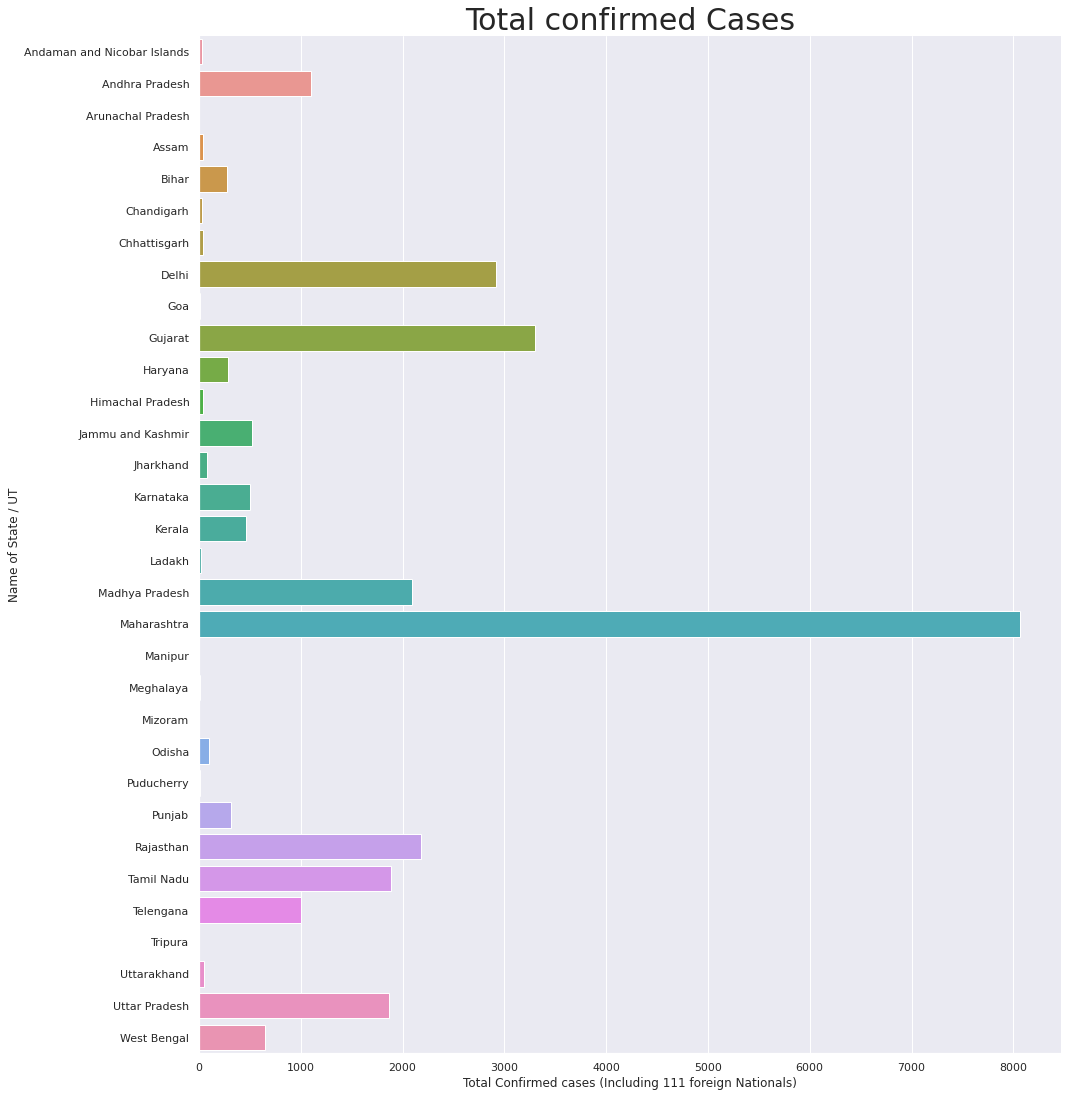

In [61]:

sns.catplot(y="Name of State / UT", x="Total Confirmed cases (Including 111 foreign Nationals)",height=15,aspect=1,kind="bar", data=latest)
plt.title('Total confirmed Cases',size=30)
plt.show()


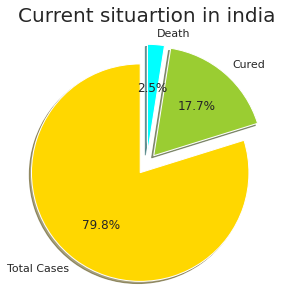

In [62]:
cases=latest['Total Confirmed cases (Including 111 foreign Nationals)'].sum()
cdm=latest['Cured/Discharged/Migrated'].sum()
d=latest['Death'].sum()

plt.figure(figsize=(5,5))
plt.title("Current situartion in india",fontsize=20)
labels='Total Cases','Cured','Death'
sizes=[cases,cdm,d]
explode=[0.1,0.1,0.1]
colors=['gold','yellowgreen','aqua']
plt.pie(sizes,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True,startangle=90)
plt.show() 

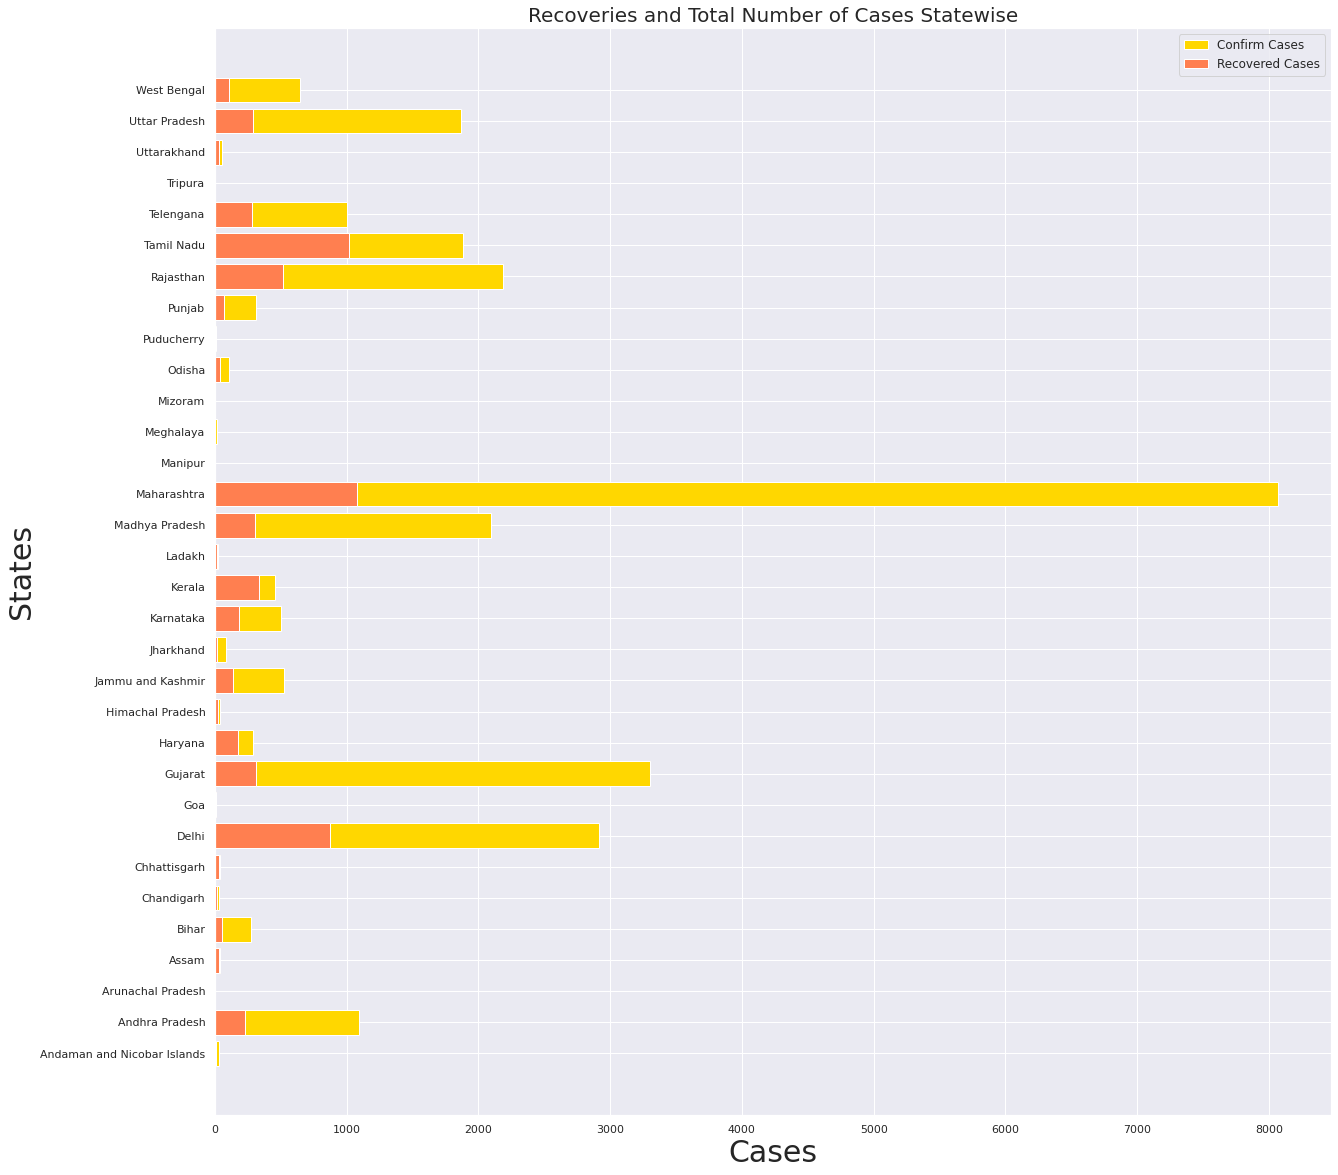

In [63]:
plt.figure(figsize=(20,20))
plt.barh(latest["Name of State / UT"],latest['Total Confirmed cases (Including 111 foreign Nationals)'],label="Confirm Cases",color='gold')
plt.barh(latest["Name of State / UT"], latest['Cured/Discharged/Migrated'],label="Recovered Cases",color='coral')
plt.xlabel('Cases',size=30)
plt.ylabel("States",size=30)
plt.legend(frameon=True, fontsize=12)
plt.title('Recoveries and Total Number of Cases Statewise',fontsize = 20)
plt.show()

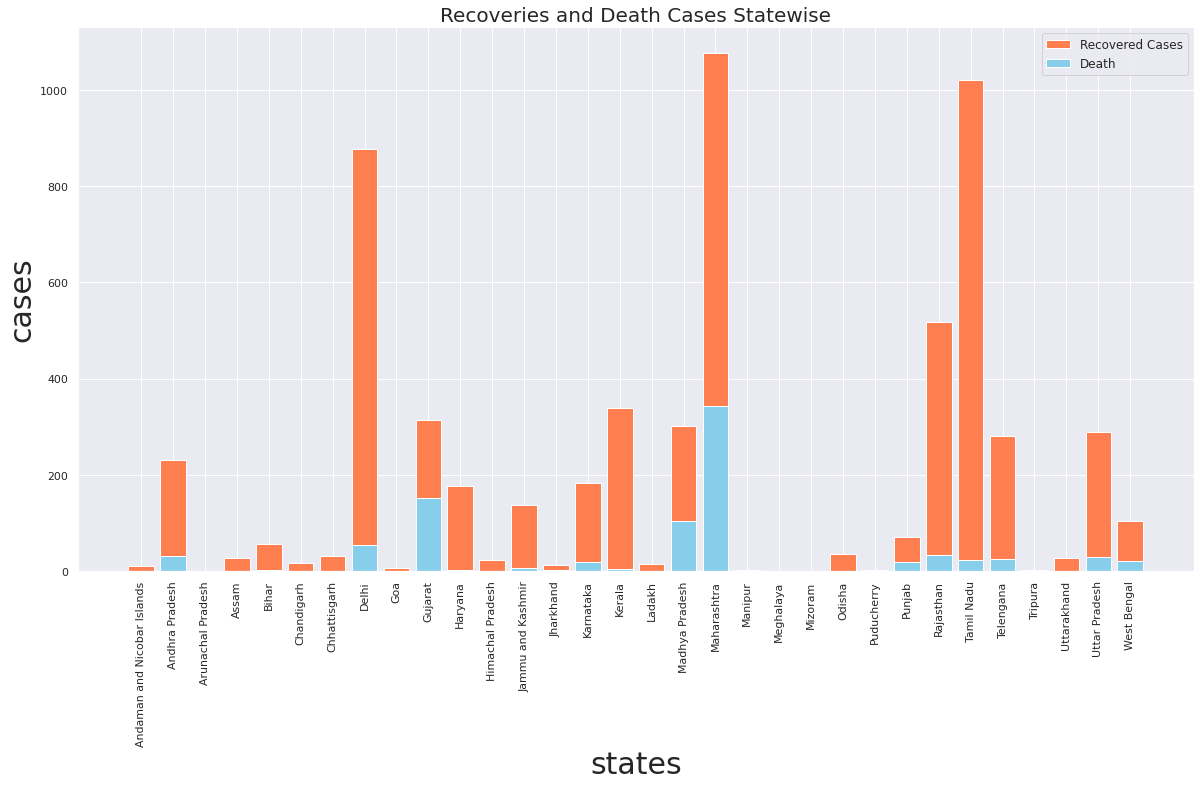

In [64]:
plt.figure(figsize=(20,10))
plt.bar(latest["Name of State / UT"], latest['Cured/Discharged/Migrated'],label="Recovered Cases",color='coral')
plt.bar(latest["Name of State / UT"],latest['Death'],label="Death",color='skyblue')
plt.xlabel('states',size=30)
plt.xticks(rotation=90)
plt.ylabel("cases",size=30)
plt.legend(frameon=True, fontsize=12)
plt.title('Recoveries and Death Cases Statewise',fontsize = 20)
plt.show()

# **30th April-1st May,2020**

In [65]:
rec=pd.read_csv('../input/yolooo/30-04-2020.csv')
rec.head()

,S. No.,Name of State / UT,Total Confirmed cases (Including 111 foreign Nationals),Cured/Discharged/Migrated,Death,Latitude,Longitude
0,1.0,Andaman and Nicobar Islands,33.0,16.0,0.0,11.7401,92.6586
1,2.0,Andhra Pradesh,1463.0,403.0,33.0,15.9129,79.7400
2,3.0,Arunachal Pradesh,1.0,1.0,0.0,28.2180,94.7278
3,4.0,Assam,42.0,29.0,1.0,26.2006,92.9376
4,5.0,Bihar,426.0,82.0,2.0,25.0961,85.3131


**Highest cases,deaths and active cases**

In [66]:
rec['Total Confirmed cases (Including 111 foreign Nationals)'].argmax()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


18

In [67]:
rec.loc[18]

S. No.                                                              19
Name of State / UT                                         Maharashtra
Total Confirmed cases (Including 111 foreign Nationals)          10498
Cured/Discharged/Migrated                                         1773
Death                                                              459
Latitude                                                       19.7515
Longitude                                                      75.7139
Name: 18, dtype: object

In [68]:
rec['Death'].argmax()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


18

In [69]:
rec.loc[18]

S. No.                                                              19
Name of State / UT                                         Maharashtra
Total Confirmed cases (Including 111 foreign Nationals)          10498
Cured/Discharged/Migrated                                         1773
Death                                                              459
Latitude                                                       19.7515
Longitude                                                      75.7139
Name: 18, dtype: object

In [70]:
rec['Cured/Discharged/Migrated'].argmax()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


18

**It seems that for all the above category Maharashtra is on the top of the list**

**Lets also check out the state with minimum cases,deaths and recoveries**

In [71]:
rec['Cured/Discharged/Migrated'].argmin()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  """Entry point for launching an IPython kernel.


20

In [72]:
rec.loc[20]

S. No.                                                            21
Name of State / UT                                         Meghalaya
Total Confirmed cases (Including 111 foreign Nationals)           12
Cured/Discharged/Migrated                                          0
Death                                                              1
Latitude                                                      25.467
Longitude                                                    91.3662
Name: 20, dtype: object

In [73]:
rec['Total Confirmed cases (Including 111 foreign Nationals)'].argmin()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  """Entry point for launching an IPython kernel.


2

In [74]:
rec.loc[2]

S. No.                                                                     3
Name of State / UT                                         Arunachal Pradesh
Total Confirmed cases (Including 111 foreign Nationals)                    1
Cured/Discharged/Migrated                                                  1
Death                                                                      0
Latitude                                                              28.218
Longitude                                                            94.7278
Name: 2, dtype: object

**Lets see how many states have zeo cases of deaths(true:zero death,false:cases prevail)**

In [75]:
deaths={'states':rec["Name of State / UT"] ,'deaths':rec['Death']==0}
df=pd.DataFrame(deaths,index=range(32))
df

,states,deaths
0,Andaman and Nicobar Islands,True
1,Andhra Pradesh,False
2,Arunachal Pradesh,True
3,Assam,False
4,Bihar,False
5,Chandigarh,True
6,Chhattisgarh,True
7,Delhi,False
8,Goa,True
9,Gujarat,False


In [76]:
import folium
from folium import plugins


m = folium.Map(location=[20.5937, 78.9629],zoom_start=5,tiles='cartodbpositron')

for lat,lon,area,count in zip(rec['Latitude'],rec['Longitude'],rec['Name of State / UT'],rec['Total Confirmed cases (Including 111 foreign Nationals)']):
    folium.CircleMarker([lat, lon],
                            popup=area,
                            radius=count*0.005,
                            color='neon',
                            fill=True,
                            fill_opacity=0.7,
                            fill_color='skyblue',
                           ).add_to(m)
location_data = rec[['Latitude', 'Longitude']].as_matrix()

# plot heatmap
m.add_child(plugins.HeatMap(location_data, radius=40,blur=10))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


In [77]:
d=pd.read_csv("../input/1may30april/may.csv")
d.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,30/04/20,5:00 PM,Andaman and Nicobar Islands,-,-,15.0,0.0,33.0
1,30/04/20,5:00 PM,Andhra Pradesh,-,-,321.0,31.0,1403.0
2,30/04/20,5:00 PM,Arunachal Pradesh,-,-,1.0,0.0,1.0
3,30/04/20,5:00 PM,Assam,-,-,29.0,1.0,42.0
4,30/04/20,5:00 PM,Bihar,-,-,65.0,2.0,403.0


**Grouping of State/UnionTerritory with respect to cases and finding out their mean values and plotting it**

In [78]:
d.groupby("State/UnionTerritory")['Confirmed'].mean()

State/UnionTerritory
Andaman and Nicobar Islands       33.0
Andhra Pradesh                  1433.0
Arunachal Pradesh                  1.0
Assam                             42.0
Bihar                            414.5
Chandigarh                        56.0
Chhattisgarh                      39.0
Delhi                           3477.0
Goa                                7.0
Gujarat                         4238.5
Haryana                          311.5
Himachal Pradesh                  40.0
Jammu and Kashmir                597.5
Jharkhand                        109.0
Karnataka                        566.5
Kerala                           496.5
Ladakh                            22.0
Madhya Pradesh                  2689.5
Maharashtra                    10206.5
Manipur                            2.0
Meghalaya                         12.0
Mizoram                            1.0
Odisha                           135.5
Puducherry                         8.0
Punjab                           357.0
Raja

**Confirmed and Cured Cases**

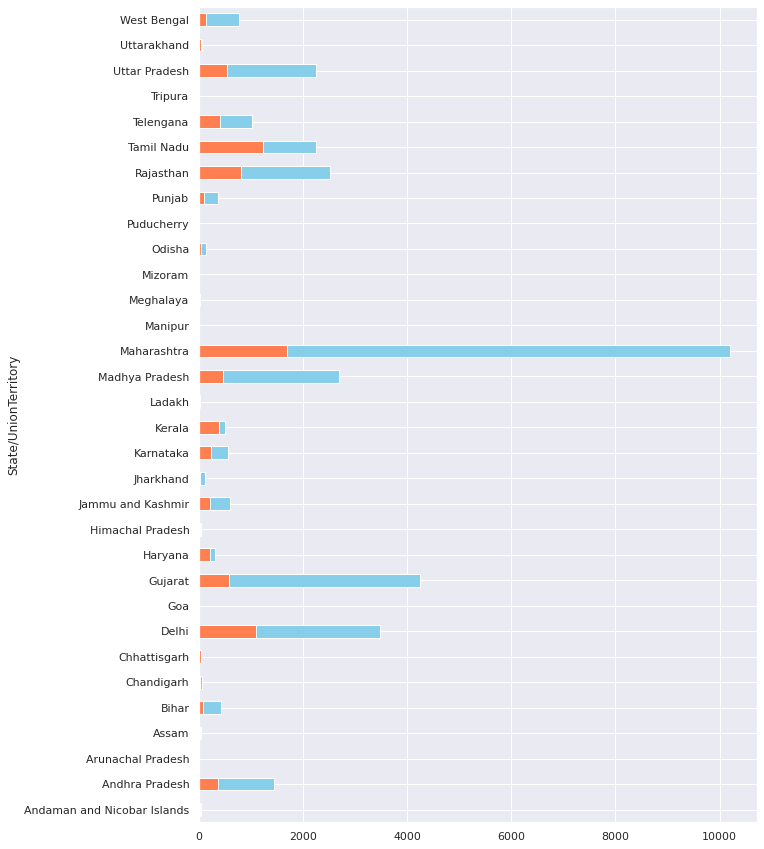

In [79]:

d.groupby("State/UnionTerritory")['Confirmed'].mean().plot(kind='barh',color='skyblue',figsize=(10,15))
d.groupby("State/UnionTerritory")['Cured'].mean().plot(kind='barh',color='coral')



# 11th May,2020

In [80]:
may=pd.read_csv('../input/dynamiccovid19india-statewise/11-05-2020.csv')
may.head()

,S. No.,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Deaths**
0,1,Andaman and Nicobar Islands,33.0,33.0,0.0
1,2,Andhra Pradesh,1980.0,925.0,45.0
2,3,Arunachal Pradesh,1.0,1.0,0.0
3,4,Assam,63.0,34.0,2.0
4,5,Bihar,696.0,365.0,6.0


In [81]:
may=may.drop([33,34,35,36,37])

**Total confirmed cases so far**

In [82]:
cases=may['Total Confirmed cases*'].sum()
cases

67152.0

In [83]:
prev=rec['Total Confirmed cases (Including 111 foreign Nationals)'].sum()
print("The increase in the number of cases in the past 10 days",cases-prev)

The increase in the number of cases in the past 10 days 32180.0


In [84]:
percentage=(cases-prev)/prev*100
print("The increse in percentage of cases from 30th April to 11th May 2020:",percentage)

The increse in percentage of cases from 30th April to 11th May 2020: 92.01647031911243


In [85]:
df=may.nlargest(5,'Total Confirmed cases*')

Text(0.5, 1.0, 'TOP 5 STATES WITH THE MAXIMUM NUMBER OF CASES')

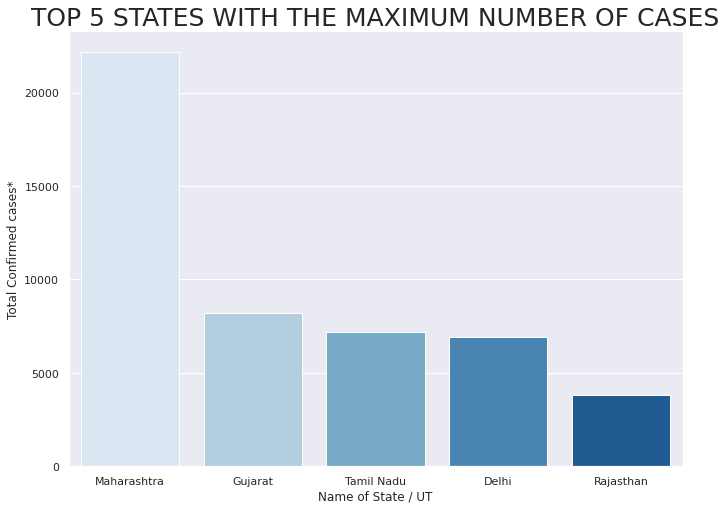

In [86]:
sns.barplot( x=df["Name of State / UT"], y=df["Total Confirmed cases*"], palette="Blues")
plt.title("TOP 5 STATES WITH THE MAXIMUM NUMBER OF CASES",size=25)


Text(0.5, 1.0, 'TOP 5 Infected STATES and the number of people cured')

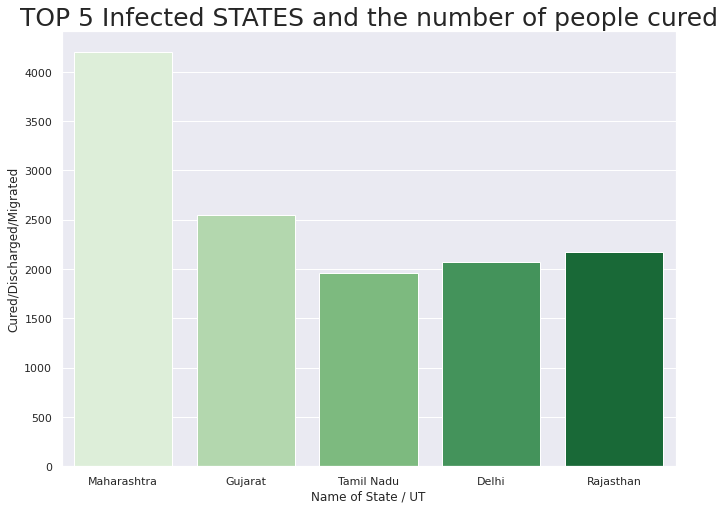

In [87]:
sns.barplot( x=df["Name of State / UT"], y=df["Cured/Discharged/Migrated"], palette="Greens")
plt.title("TOP 5 Infected STATES and the number of people cured",size=25)

Text(0.5, 1.0, 'TOP 5 Infected STATES and the number of Deaths')

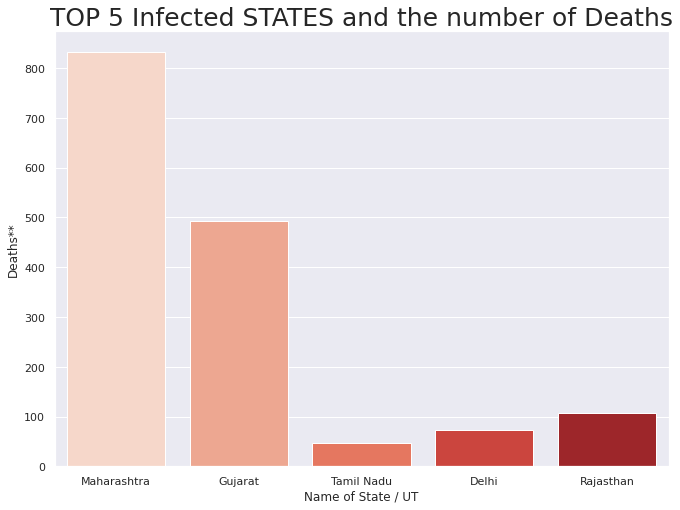

In [88]:
sns.barplot( x=df["Name of State / UT"], y=df["Deaths**"], palette="Reds")
plt.title("TOP 5 Infected STATES and the number of Deaths",size=25)

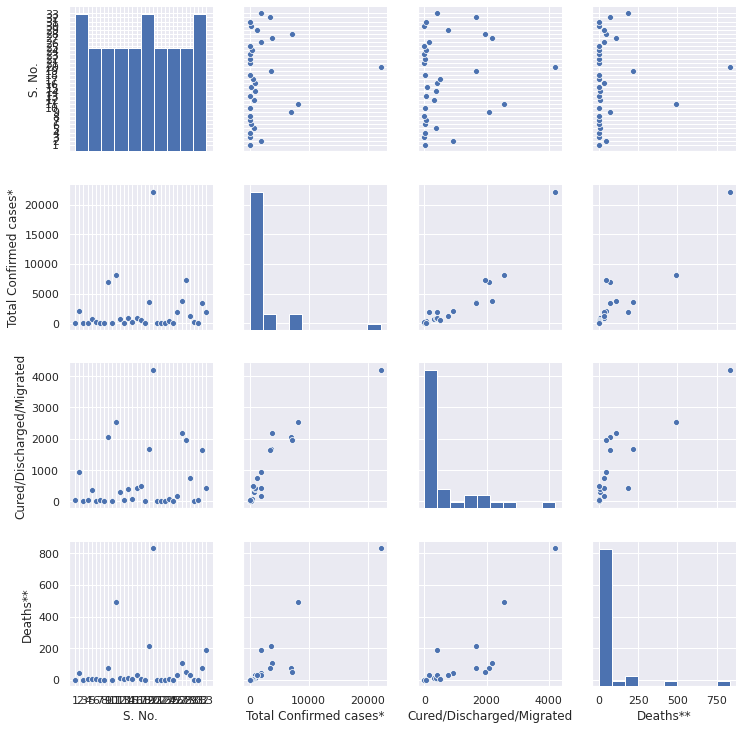

In [89]:
sns.pairplot(may, kind="scatter")

 
